In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import pandas as pd


In [3]:
data=pd.read_csv('dataset_candidatura_wr/odometry_and_odometrycorrected.txt')
data=data.iloc[:,:-1]
cols=['x_w','y_w','th_w','x_1','y_1','th_1','x_2','y_2','th_2','x','y','th']
data.columns=cols
data['error_w']=np.linalg.norm(data[['x_w','y_w']].values-data[['x','y']].values ,axis=1)
data['error_th_w']=np.linalg.norm(data[['th_w']].values-data[['th']].values ,axis=1)
data['error_1']=np.linalg.norm(data[['x_1','y_1']].values-data[['x','y']].values ,axis=1)
data['error_th_1']=np.linalg.norm(data[['th_1']].values-data[['th']].values ,axis=1)
data['error_2']=np.linalg.norm(data[['x_2','y_2']].values-data[['x','y']].values ,axis=1)
data['error_th_w']=np.linalg.norm(data[['th_2']].values-data[['th']].values ,axis=1)

data

,x_w,y_w,th_w,x_1,y_1,th_1,x_2,y_2,th_2,x,y,th,error_w,error_th_w,error_1,error_th_1,error_2
0,-0.000635,0.000883,0.008090,-0.000635,0.000883,0.008090,-0.000635,0.000883,0.008090,-0.000080,0.000892,0.007933,0.000555,0.000157,0.000555,0.000157,0.000555
1,-0.000750,0.000888,0.008029,-0.000750,0.000888,0.008029,-0.000750,0.000888,0.008029,-0.000065,0.000902,0.007948,0.000684,0.000081,0.000684,0.000081,0.000684
2,-0.000635,0.000891,0.008160,-0.000635,0.000891,0.008160,-0.000635,0.000891,0.008160,-0.000079,0.000906,0.008009,0.000556,0.000151,0.000556,0.000151,0.000556
3,-0.000749,0.000896,0.008099,-0.000749,0.000896,0.008099,-0.000749,0.000896,0.008099,-0.000078,0.000910,0.008073,0.000671,0.000027,0.000671,0.000027,0.000671
4,-0.000749,0.000901,0.008147,-0.000749,0.000901,0.008147,-0.000749,0.000901,0.008147,-0.000077,0.000914,0.008099,0.000672,0.000048,0.000672,0.000048,0.000672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,-0.034272,1.852576,-2.025834,-0.364016,-0.255638,0.585211,2.043388,1.667795,1.782225,2.200200,2.608614,2.597639,2.358910,0.815413,3.844365,2.012427,0.953798
3556,-0.039523,1.844332,-2.013400,-0.369268,-0.263882,0.597645,2.038136,1.659551,1.794659,2.192228,2.614362,2.611863,2.360860,0.817203,3.852992,2.014217,0.967165
3557,-0.037071,1.848220,-2.023165,-0.366815,-0.259994,0.587880,2.040589,1.663439,1.784894,2.187617,2.616829,2.662057,2.353720,0.877163,3.847237,2.074177,0.964660
3558,-0.039893,1.844372,-1.998490,-0.369637,-0.263842,0.612555,2.037766,1.659591,1.809569,2.186656,2.617057,2.705219,2.356812,0.895650,3.851520,2.092664,0.968973


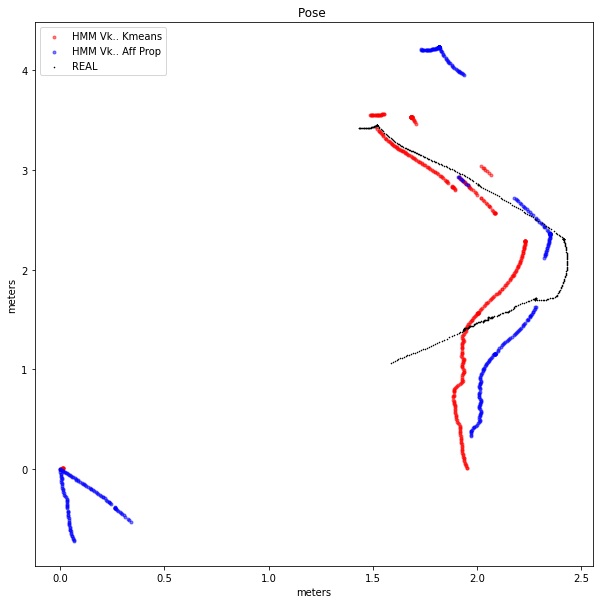

In [16]:
start=500
data_s=data.iloc[start:start+400]

fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.set_title( "Pose ")
ax1.set_ylabel('meters')
ax1.set_xlabel('meters')
ax1.scatter(x= data_s.x_1, y=data_s.y_1,marker='.',c='red',alpha=.5,label= 'HMM Vk.. Kmeans')
ax1.scatter(x= data_s.x_2, y=data_s.y_2,marker='.',c='blue',alpha=.5,label= 'HMM Vk.. Aff Prop')
#ax1.scatter(x= data_s.x_w, y=data_s.y_w,marker='*',c='green',alpha=.5,label= 'Wheel')
ax1.scatter(x= data_s.x, y=data_s.y,marker='*',s=.5,c='black',label= "REAL")
plt.legend()



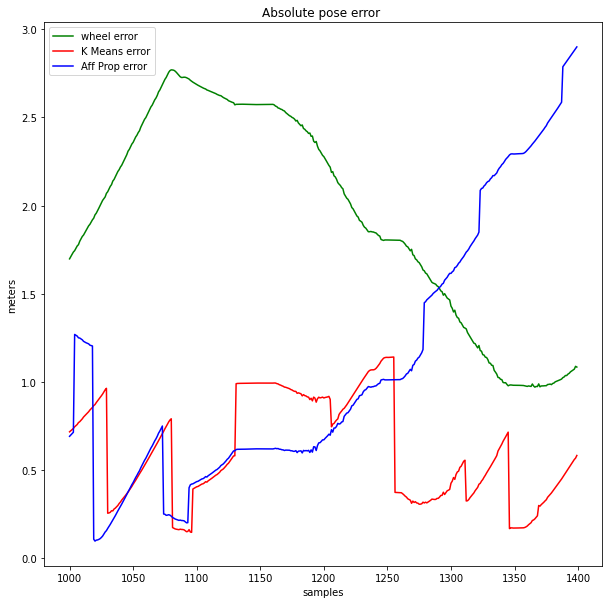

In [18]:
start=1000
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.set_title( "Absolute pose error ")
ax1.set_ylabel('meters')
ax1.set_xlabel('samples')
plt.plot(data.error_w[start:start+400],c='green',label='wheel error')
plt.plot(data.error_1[start:start+400],c='red',label='K Means error')
plt.plot(data.error_2[start:start+400],c='blue',label='Aff Prop error')


ax1.legend()

/home/oscar/py3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


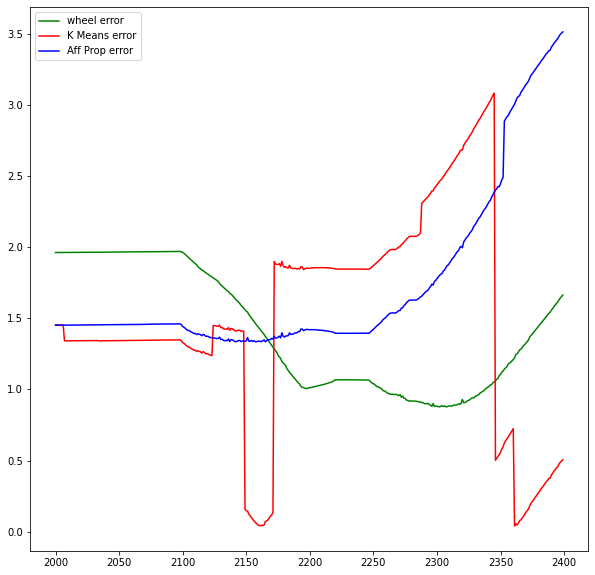

In [6]:
start=2000
fig = plt.figure(figsize=(10,10))
plt.plot(data.error_w[start:start+400],c='green',label='wheel error')
plt.plot(data.error_1[start:start+400],c='red',label='K Means error')
plt.plot(data.error_2[start:start+400],c='blue',label='Aff Prop error')

ax1 = fig.add_subplot(111)
ax1.legend()

/home/oscar/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


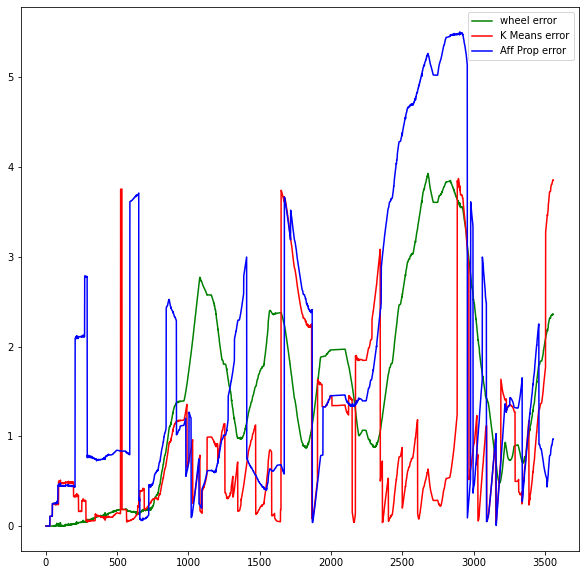

In [7]:
fig = plt.figure(figsize=(10,10))
plt.plot(data.error_w,c='green',label='wheel error')
plt.plot(data.error_1,c='red',label='K Means error')
plt.plot(data.error_2,c='blue',label='Aff Prop error')

ax1 = fig.add_subplot(111)
ax1.legend()

/home/oscar/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


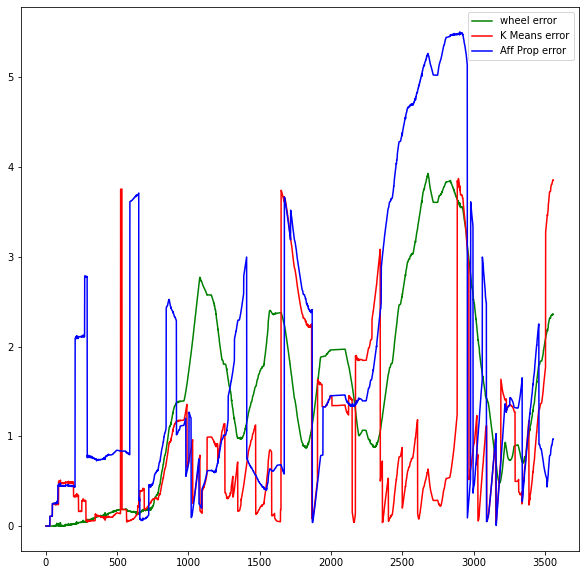

In [8]:
fig = plt.figure(figsize=(10,10))
plt.plot(data.error_w,c='green',label='wheel error')
plt.plot(data.error_1,c='red',label='K Means error')
plt.plot(data.error_2,c='blue',label='Aff Prop error')

ax1 = fig.add_subplot(111)
ax1.legend()

In [9]:
trans.shape


NameError: name 'trans' is not defined

In [ ]:
ccxyth=np.load('ccxyth.npy')
A=np.load('A.npy')
N=len(A)
N

In [ ]:
ccxyth.shape

In [ ]:
for i in range (N):
    for j in range (N):
        trans[i,j,:]= ccxyth[i,:]-ccxyth[j,:]
    

In [ ]:
np.save('trans.npy',trans)